# Introduction

### Air Quality Prediction

# 📥 Importing Libraries

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 🗃️ Loading Dataset

In [29]:
data = pd.read_csv("/home/msc2/Desktop/Subjects/MDSC-301/Project_ML/data/Air.csv", encoding = 'cp1252')

# 📝 Meta information of Dataframe

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [31]:
data.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [32]:
data.columns

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

In [33]:
data.shape

(435742, 13)

In [34]:
data.describe()

,so2,no2,rspm,spm,pm2_5
count,401096.000000,419509.000000,395520.000000,198355.000000,9314.000000
mean,10.829414,25.809623,108.832784,220.783480,40.791467
std,11.177187,18.503086,74.872430,151.395457,30.832525
min,0.000000,0.000000,0.000000,0.000000,3.000000
25%,5.000000,14.000000,56.000000,111.000000,24.000000
50%,8.000000,22.000000,90.000000,187.000000,32.000000
75%,13.700000,32.200000,142.000000,296.000000,46.000000
max,909.000000,876.000000,6307.033333,3380.000000,504.000000


In [35]:
data.nunique()

stn_code                        803
sampling_date                  5485
state                            37
location                        304
agency                           64
type                             10
so2                            4197
no2                            6864
rspm                           6065
spm                            6668
location_monitoring_station     991
pm2_5                           433
date                           5067
dtype: int64

#  🔎 Checking for NaN values

In [36]:
data.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

## 😱

### There are a lot of NaN values present in the dataset. Let's go and clean them 🧗

# 🧹 Cleaning Data

In [37]:
### Checking all null values and treating those null values.
nullvalues = data.isnull().sum().sort_values(ascending=False)
nullvalues

pm2_5                          426428
spm                            237387
agency                         149481
stn_code                       144077
rspm                            40222
so2                             34646
location_monitoring_station     27491
no2                             16233
type                             5393
date                                7
sampling_date                       3
location                            3
state                               0
dtype: int64

In [38]:
null_values_percentage = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
missing_data_with_percentage

,Total,Percent
pm2_5,426428,97.862497
spm,237387,54.478797
agency,149481,34.304933
stn_code,144077,33.064749
rspm,40222,9.230692
so2,34646,7.951035
location_monitoring_station,27491,6.309009
no2,16233,3.725370
type,5393,1.237659
date,7,0.001606


### We can see above these are the percentages of null values present in the columns of the dataset

In [39]:
# Dropping unnecessary columns
data.drop(['agency'],axis=1,inplace=True)
data.drop(['stn_code'],axis=1,inplace=True)
data.drop(['date'],axis=1,inplace=True)
data.drop(['sampling_date'],axis=1,inplace=True)
data.drop(['location_monitoring_station'],axis=1,inplace=True)

In [40]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN


In [41]:
data.isnull().sum()

state            0
location         3
type          5393
so2          34646
no2          16233
rspm         40222
spm         237387
pm2_5       426428
dtype: int64

In [42]:
data

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,NaN,NaN
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,NaN,NaN
435739,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# Null value Imputation for categorical data
data['location']=data['location'].fillna(data['location'].mode()[0])
data['type']=data['type'].fillna(data['type'].mode()[0])


In [44]:
data.fillna(0, inplace=True) # null values are replaced with 0's

### Now let us check for null values

In [45]:
data.isnull().sum()

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
dtype: int64

## 😇

In [46]:
data

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0


# 🔥 EDA & Visualization

In [47]:
data.head()

,state,location,type,so2,no2,rspm,spm,pm2_5
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0


In [48]:
data['state'].value_counts()

Maharashtra                    60384
Uttar Pradesh                  42816
Andhra Pradesh                 26368
Punjab                         25634
Rajasthan                      25589
Kerala                         24728
Himachal Pradesh               22896
West Bengal                    22463
Gujarat                        21279
Tamil Nadu                     20597
Madhya Pradesh                 19920
Assam                          19361
Odisha                         19279
Karnataka                      17119
Delhi                           8551
Chandigarh                      8520
Chhattisgarh                    7831
Goa                             6206
Jharkhand                       5968
Mizoram                         5338
Telangana                       3978
Meghalaya                       3853
Puducherry                      3785
Haryana                         3420
Nagaland                        2463
Bihar                           2275
Uttarakhand                     1961
J

[]

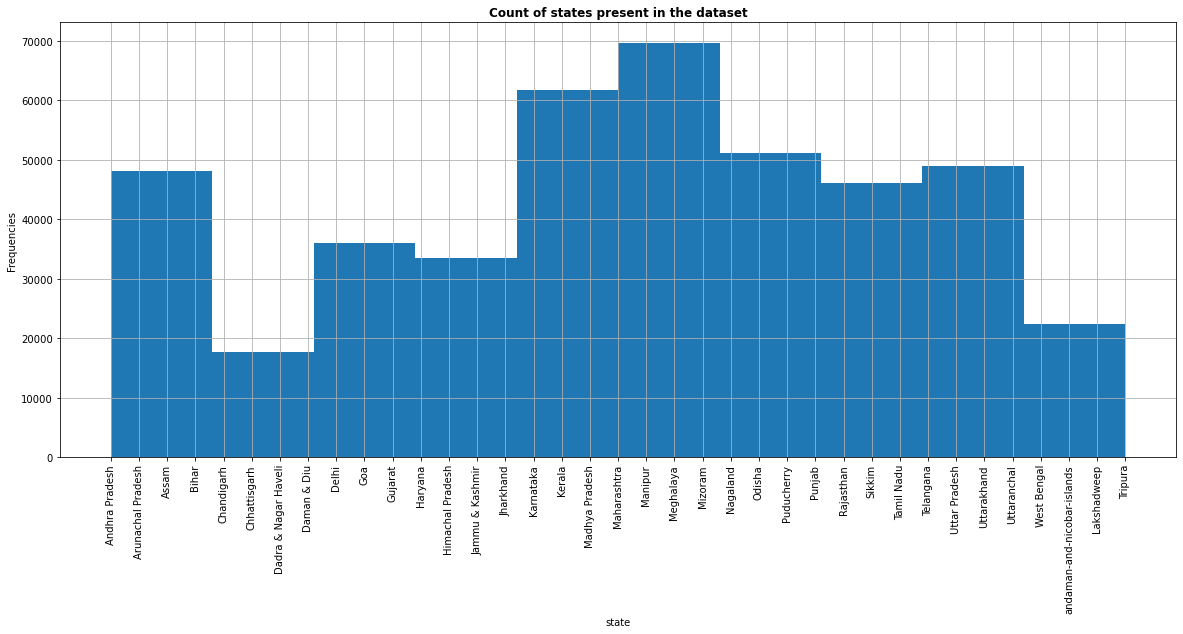

In [49]:
plt.figure(figsize = (20,8))
plt.title('Count of states present in the dataset',fontweight=800)
plt.xticks(rotation=90)
data.state.hist()
plt.xlabel('state')
plt.ylabel('Frequencies')
plt.plot()

### The visualization shows us the count of states present in the dataset.

In [50]:
print("Count of Types present in the dataset.")
data['type'].value_counts()

Count of Types present in the dataset.


Residential, Rural and other Areas    184407
Industrial Area                        96091
Residential and others                 86791
Industrial Areas                       51747
Sensitive Area                          8980
Sensitive Areas                         5536
RIRUO                                   1304
Sensitive                                495
Industrial                               233
Residential                              158
Name: type, dtype: int64

[]

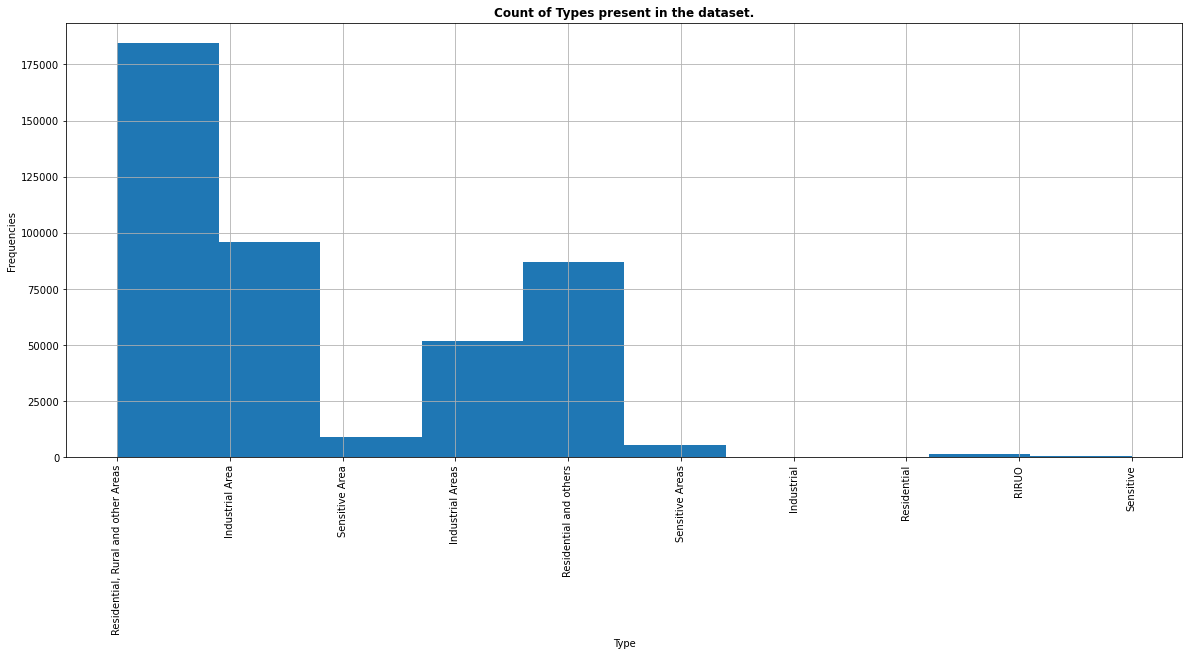

In [51]:
plt.figure(figsize=(20, 8))
plt.title('Count of Types present in the dataset.',fontweight=800)
plt.xticks(rotation=90)
data.type.hist()
plt.xlabel('Type')
plt.ylabel('Frequencies')
plt.plot()

### The visualization shows us the count of Types present in the dataset.

<AxesSubplot:title={'center':'State having higher so2 levels in the air'}, xlabel='state', ylabel='so2'>

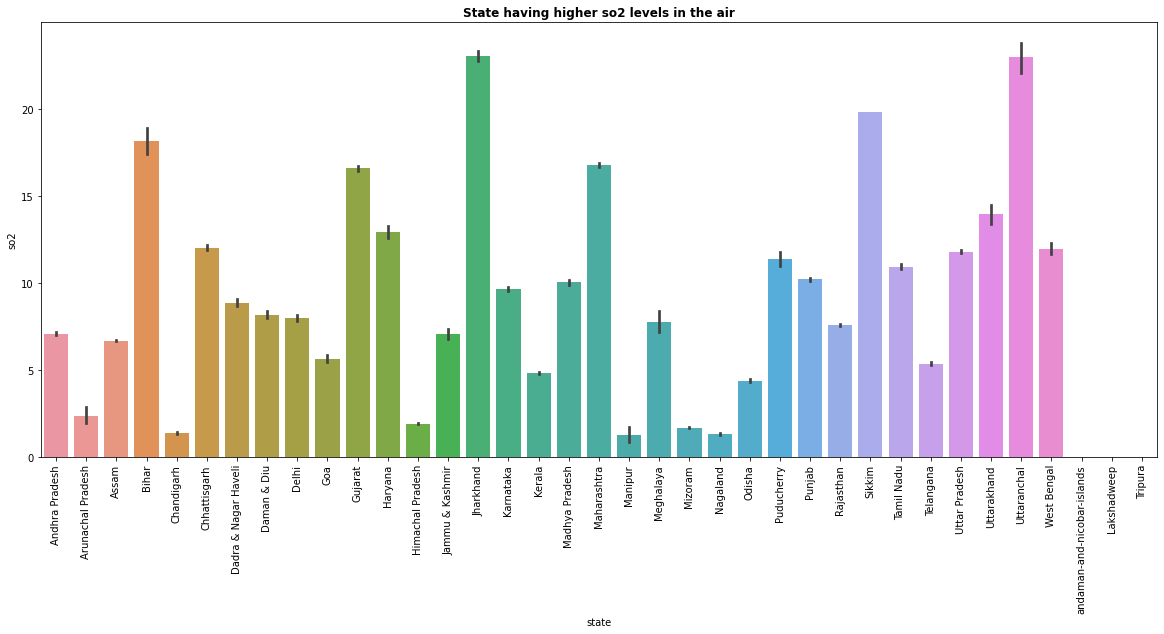

In [52]:
plt.figure(figsize=(20, 8))
plt.title("State having higher so2 levels in the air", fontweight = 800)
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=data)

### shows that Uttaranchal state having higher so2 levels in the air followed by Uttarakhand.

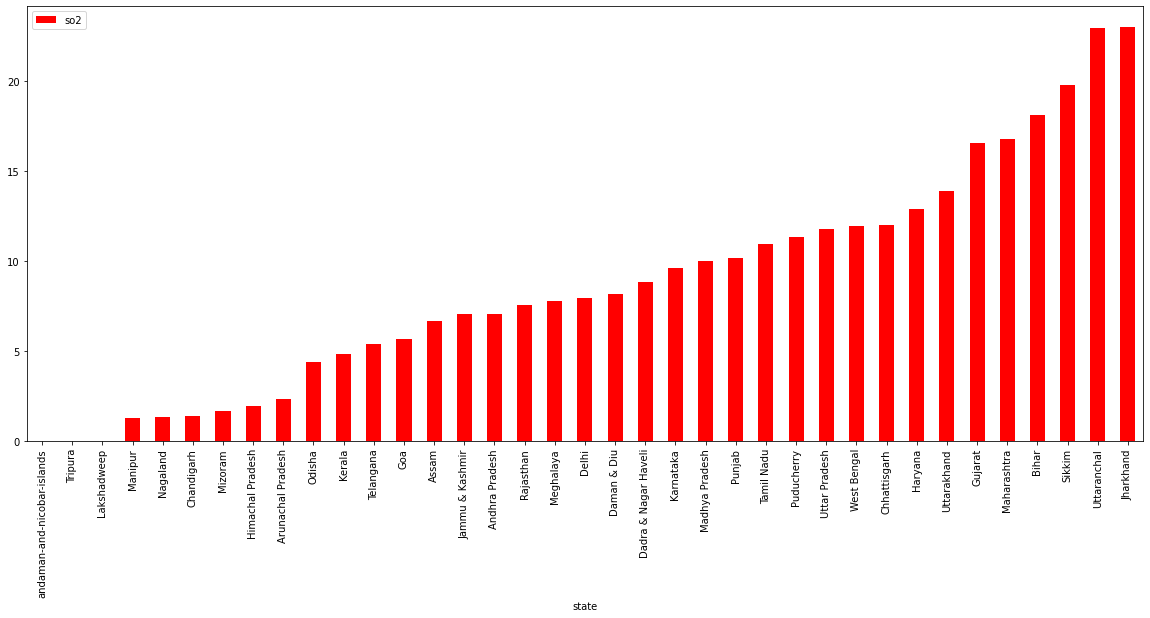

In [53]:
plt.rcParams['figure.figsize']=(20,8)
data[['so2','state']].groupby(["state"]).mean().sort_values(by='so2').plot.bar(color='red')
plt.show()

### Clear picture of the states in an increasing order based on their so2 levels.

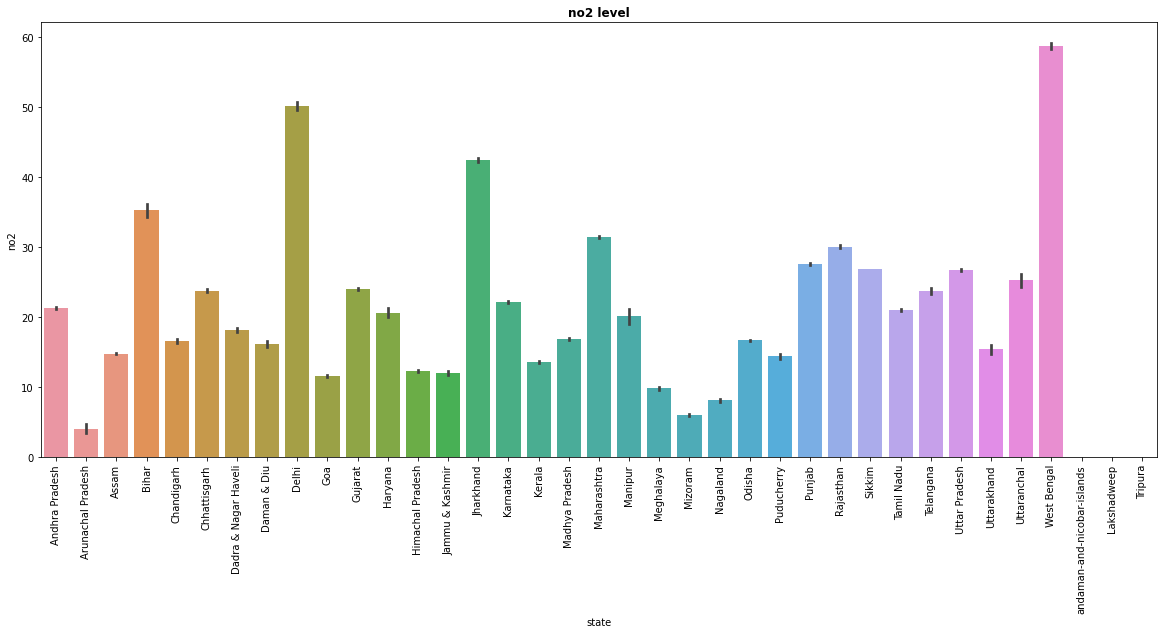

In [54]:
plt.figure(figsize=(20, 8))
plt.title("no2 level",fontweight = 800)
plt.xticks(rotation=90)
sns.barplot(x='state',y='no2',data=data);

### West bengal has a higher no2 level compared to other states 

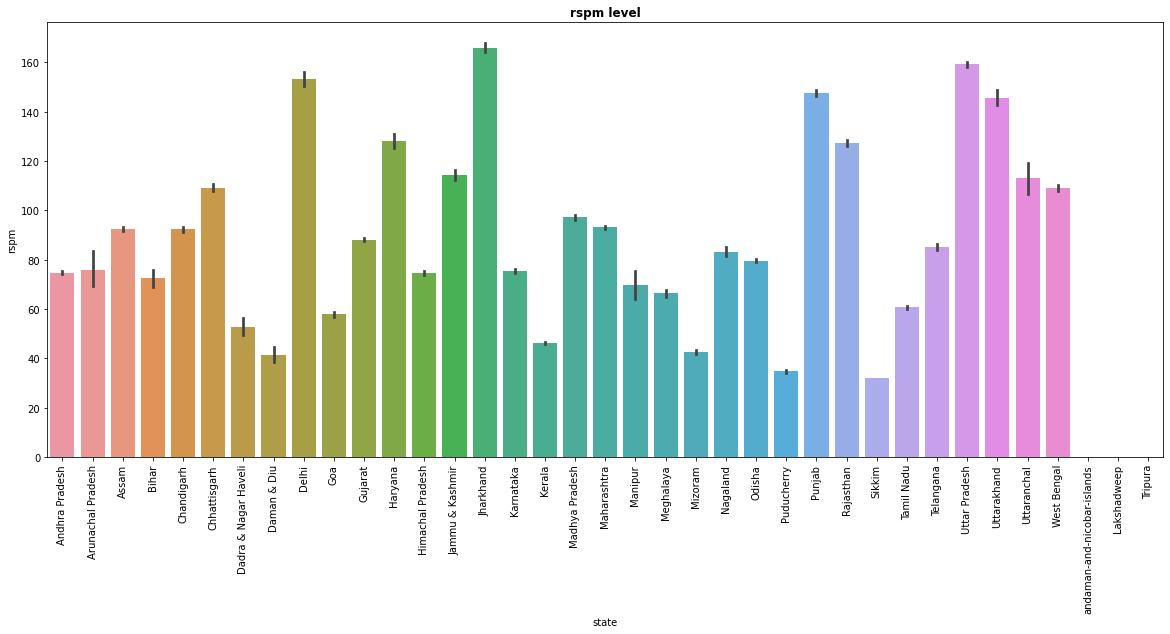

In [55]:
plt.figure(figsize=(20, 8))
plt.title("rspm level",fontweight = 800)
plt.xticks(rotation=90)
sns.barplot(x='state',y='rspm',data=data);

### Delhi has higher rspm level compared to other states 

# CALCULATING AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

In [56]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['SOi']=data['so2'].apply(cal_SOi)
data1= data[['so2','SOi']]
data1.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


### Function to calculate no2 individual pollutant index(ni)

In [57]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['Noi']=data['no2'].apply(cal_Noi)
data1= data[['no2','Noi']]
data1.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


### Function to calculate rspm individual pollutant index(rpi)

In [58]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['Rpi']=data['rspm'].apply(cal_RSPMI)
data1 = data[['rspm','Rpi']]
data1.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### Function to calculate spm individual pollutant index(spi)

In [59]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi
   
data['SPMi']=data['spm'].apply(cal_SPMi)
data1 = data[['spm','SPMi']]
data1.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


### function to calculate the air quality index (AQI) of every data value

In [60]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

data['AQI']=data.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data1 = data[['state','SOi','Noi','Rpi','SPMi','AQI']]
data1.head()
# Caluclating the Air Quality Index.

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


### Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

In [61]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

data['AQI_Range'] = data['AQI'] .apply(AQI_Range)
data.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [62]:
data['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

Good              219643
Poor               93272
Moderate           56571
Unhealthy          31733
Hazardous          18700
Very unhealthy     15823
Name: AQI_Range, dtype: int64

### Splitting the dataset into Dependent and Independent columns

In [68]:
X=data[['SOi','Noi','Rpi','SPMi']]
Y=data['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [69]:
Y.head()
# the AQI column is the target column

0    21.750
1     8.750
2    35.625
3    18.375
4     9.375
Name: AQI, dtype: float64

In [70]:
data1

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375
...,...,...,...,...,...,...
435737,West Bengal,27.500,62.500,0.0,0.0,62.500
435738,West Bengal,25.000,57.500,0.0,0.0,57.500
435739,andaman-and-nicobar-islands,0.000,0.000,0.0,0.0,0.000
435740,Lakshadweep,0.000,0.000,0.0,0.0,0.000


In [112]:
data

,state,location,type,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,West Bengal,ULUBERIA,RIRUO,22.0,50.0,143.0,0.0,0.0,27.500,62.500,0.0,0.0,62.500,Moderate
435738,West Bengal,ULUBERIA,RIRUO,20.0,46.0,171.0,0.0,0.0,25.000,57.500,0.0,0.0,57.500,Moderate
435739,andaman-and-nicobar-islands,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,Good
435740,Lakshadweep,Guwahati,"Residential, Rural and other Areas",0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000,Good


# ✂️ Train test split

In [71]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(348593, 4) (87149, 4) (348593,) (87149,)


# 📚 Training model

### Linear Regression

In [73]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [75]:
train_pred=model.predict(X_train)#predicting train
test_pred=model.predict(X_test)#predicting on test

In [76]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("Root Mean Square Error TrainingData = ",str(RMSE_train))
print("Root Mean Square Error TestData = ",str(RMSE_test))
print('-'*80)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

Root Mean Square Error TrainingData =  13.583424938613533
Root Mean Square Error TestData =  13.672937344789004
--------------------------------------------------------------------------------
RSquared value on train: 0.9849533579250526
RSquared value on test: 0.9847286394495923


### Decision Tree Regressor

In [77]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [78]:
train_preds=DT.predict(X_train)#predicting train
test_preds=DT.predict(X_test)#predicting on test

In [79]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*80)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  2.1821968820263136e-13
RMSE TestData =  1.307384387232864
--------------------------------------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9998603758082645


## Classification Algorithms

In [118]:
X2 = data[['SOi','Noi','Rpi','SPMi']]
Y2 = data['AQI_Range']
# Splitting the data into independent and dependent columns for classification 

In [119]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)# Splitting the data into training and testing data 

### Logistic Regression

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,f1_score,ConfusionMatrixDisplay,precision_score

In [121]:
log_reg = LogisticRegression()
log_reg.fit(X_train2, Y_train2)#fit the model on train data 
train_preds2 = log_reg.predict(X_train2)#predict on train 
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))#accuracy on train
test_preds2 = log_reg.predict(X_test2)#predict on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))#accuracy on test
print('-'*80)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))# Kappa Score.
# print('Precision: %.3f' % precision_score(Y_test2, test_preds2))
# print('Recall: %.3f' % recall_score(Y_test2, test_preds2))
# print('F1: %.3f' % f1_score(Y_test2, test_preds2))
print('Accuracy: %.3f' % accuracy_score(Y_test2, test_preds2))
# run_experiment(log_reg)

Model accuracy on train is:  0.7276012426913104
Model accuracy on test is:  0.7271254216071491
--------------------------------------------------------------------------------
KappaScore is:  0.584377382981496
Accuracy: 0.727


In [122]:
print(log_reg.predict([[727,327.55,78.2,100]]))

['Good']


In [123]:
print(log_reg.predict([[2.7,45,35.16,23]]))

['Poor']


In [124]:
print(log_reg.predict([[10,2.8,82,20]]) )

['Good']


In [125]:
print(log_reg.predict([[2,45.8,37,32]]))

['Poor']


### Random Forest Classifier

In [126]:
RF = RandomForestClassifier()
RF.fit(X_train2,Y_train2)#fit the model on train data 
train_preds4 = RF.predict(X_train2)#predict on train 
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))#accuracy on train
test_preds4 = RF.predict(X_test2)#predict on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))#accuracy on test
print('-'*80)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))# Kappa Score

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9998261413818283
--------------------------------------------------------------------------------
KappaScore is:  0.9997421418642386


### K-Nearest Neighbours

In [127]:
KNN = KNeighborsClassifier()
KNN.fit(X_train2,Y_train2)#fit the model on train data 
train_preds5 = KNN.predict(X_train2)#predict on train 
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))#accuracy on train
test_preds5 = KNN.predict(X_test2)#predict on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))#accuracy on test
print('-'*80)
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))# Kappa Score

Model accuracy on train is:  0.9981640503242026
Model accuracy on test is:  0.9967105949441913
--------------------------------------------------------------------------------
KappaScore is:  0.9951204869122668


### Predictions on random values

In [128]:
print(KNN.predict([[7.4,47.7,78.182,100]]))

['Poor']


In [129]:
print(KNN.predict([[1,1.2,3.12,0]]))

['Good']


In [130]:
print(KNN.predict([[325.7,345,798.182,203]]))

['Unhealthy']


In [131]:
print(KNN.predict([[900,700,900,0]]))

['Very unhealthy']


# 🧪 Test & Train Accuracy

# ✔️ Classification report

# ✨ Thanks